In [1]:
#pip install catboost

In [2]:
#pip install --upgrade category_encoders

In [3]:
#pip install ipywidgets

In [4]:
#pip install shap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HD_processed.csv")
df.info()
print(df.shape)
pd.set_option("display.max_rows", None, "display.max_columns", None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35144 entries, 0 to 35143
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unique_ID                                          35144 non-null  int64  
 1   Invoice_Date                                       35144 non-null  object 
 2   Customer_Id                                        35144 non-null  int64  
 3   Warehouse                                          35144 non-null  object 
 4   Postal_Code                                        35144 non-null  int64  
 5   Customer_MarketSegment_Id                          35144 non-null  object 
 6   Sales_Order_Id                                     35144 non-null  object 
 7   Created_Date                                       35144 non-null  object 
 8   Job_Description                                    35144 non-null  object 
 9   Source

In [2]:
df = df.drop('Unique_ID', 1)
df = df.drop('Invoice_Date', 1)
df = df.drop('Customer_Id', 1)
df = df.drop('Warehouse', 1)
df = df.drop('Postal_Code', 1)
df = df.drop('Sales_Order_Id', 1)
df = df.drop('Created_Date', 1)
df = df.drop('Job_Description', 1)
df = df.drop('Real_Invoice_Date', 1)
df = df.drop('Quarter', 1)
df = df.drop('BigCustomer', 1)
df = df.drop('Distance_to_Toowoomba(km)', 1)
df = df.drop('Monthly_rainfall(mm)', 1)
df = df.drop('Value_building_jobs(private_sector_AUD_thousands)', 1)
df['Month'] = df['Month'].astype("object")

C:\Users\mib67\AppData\Local\Temp/ipykernel_16920/601186720.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unique_ID', 1)
C:\Users\mib67\AppData\Local\Temp/ipykernel_16920/601186720.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Invoice_Date', 1)
C:\Users\mib67\AppData\Local\Temp/ipykernel_16920/601186720.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Customer_Id', 1)
C:\Users\mib67\AppData\Local\Temp/ipykernel_16920/601186720.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Warehouse', 1)
C:\Users\mib67\AppData\Local\Temp/ipykernel_16920/601186720.py:5: FutureWarning: In

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35144 entries, 0 to 35143
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Customer_MarketSegment_Id                  35144 non-null  object 
 1   Source_Of_Supplier_Id                      35144 non-null  object 
 2   Major_Minor_Class                          35144 non-null  object 
 3   Sales_Channel                              35144 non-null  object 
 4   Processing_time(days)                      35144 non-null  int64  
 5   Month                                      35144 non-null  object 
 6   Quantile_transactions                      35144 non-null  object 
 7   Highest_daily_rainfall                     35144 non-null  float64
 8   Highest_daily_temprature(C)                35144 non-null  float64
 9   Number_building_approvals(private_sector)  35144 non-null  int64  
 10  Producer_price_index(b

<AxesSubplot:>

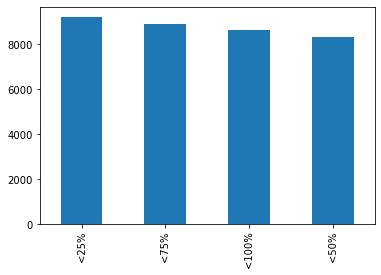

In [4]:
#balanced label column
df["Quantile_transactions"].value_counts().plot(kind="bar")

In [6]:
Y = df["Quantile_transactions"]
X = df.drop('Quantile_transactions', 1)
print(Y.shape)
print(X.shape)

(35144,)
(35144, 10)


C:\Users\mib67\AppData\Local\Temp/ipykernel_16920/793339503.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('Quantile_transactions', 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
#X_val, X_test, Y_val, Y_test = train_test_split(X_other, Y_other, test_size=0.5, random_state = 42)
print(X_train.shape)
#print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
#print(Y_val.shape)
print(Y_test.shape)

(24600, 10)
(10544, 10)
(24600,)
(10544,)


In [8]:
features = list(X_train.columns)
#catagorical features
cat_features = ["Customer_MarketSegment_Id", "Source_Of_Supplier_Id", "Major_Minor_Class", "Sales_Channel", "Month"]

In [9]:
from catboost import Pool
train_data = Pool(data=X_train,
                  label=Y_train,
                  cat_features=cat_features)

test_data = Pool(data=X_test,
                  label=Y_test,
                  cat_features=cat_features)

In [10]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(task_type = "GPU", 
                          iterations = 1000, 
                          random_state = 42, 
                          eval_metric = "Accuracy", 
                          verbose=True,
                          one_hot_max_size=150,
                          early_stopping_rounds = 50)
#no need cat_features = cat_features if we use pool
model.fit(train_data, eval_set = test_data, plot = True, use_best_model=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.145317
0:	learn: 0.4057724	test: 0.3988050	best: 0.3988050 (0)	total: 101ms	remaining: 1m 40s
1:	learn: 0.4146748	test: 0.4145486	best: 0.4145486 (1)	total: 123ms	remaining: 1m 1s
2:	learn: 0.4354472	test: 0.4403452	best: 0.4403452 (2)	total: 140ms	remaining: 46.4s
3:	learn: 0.4408130	test: 0.4477428	best: 0.4477428 (3)	total: 155ms	remaining: 38.6s
4:	learn: 0.4397154	test: 0.4442337	best: 0.4477428 (3)	total: 189ms	remaining: 37.6s
5:	learn: 0.4424797	test: 0.4495448	best: 0.4495448 (5)	total: 205ms	remaining: 34s
6:	learn: 0.4450407	test: 0.4504932	best: 0.4504932 (6)	total: 225ms	remaining: 31.9s
7:	learn: 0.4444309	test: 0.4512519	best: 0.4512519 (7)	total: 247ms	remaining: 30.7s
8:	learn: 0.4453252	test: 0.4460357	best: 0.4512519 (7)	total: 330ms	remaining: 36.4s
9:	learn: 0.4494715	test: 0.4530539	best: 0.4530539 (9)	total: 373ms	remaining: 37s
10:	learn: 0.4556504	test: 0.4602618	best: 0.4602618 (10)	total: 395ms	remaining: 35.5s
11:	learn: 0.4598374	test

In [11]:
model.tree_count_

498

In [12]:
from sklearn.metrics import balanced_accuracy_score

Y_pred = model.predict(X_test)
X_pred = model.predict(X_train)
balanced_accuracy_score(Y_test, Y_pred)
#If the dataset is well-balanced, Accuracy and Balanced Accuracy tend to converge at the same value.

0.5693447765582504

              precision    recall  f1-score   support

       <100%       0.54      0.55      0.55      2593
        <25%       0.55      0.68      0.61      2730
        <50%       0.62      0.50      0.56      2520
        <75%       0.59      0.54      0.57      2701

    accuracy                           0.57     10544
   macro avg       0.58      0.57      0.57     10544
weighted avg       0.58      0.57      0.57     10544



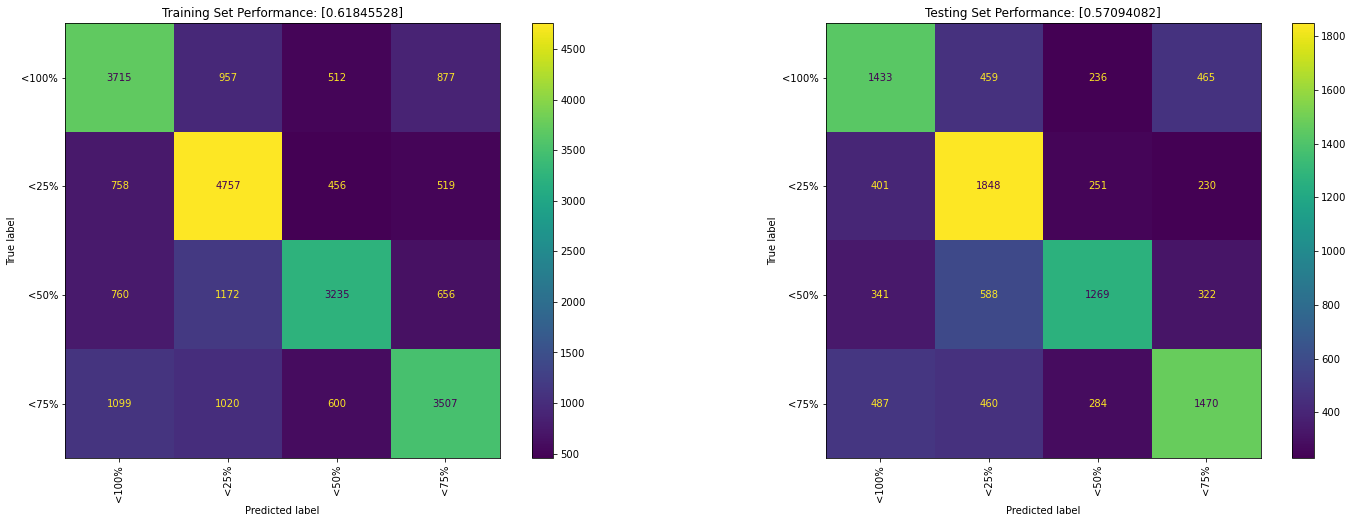

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(Y_test, model.predict(X_test)));

fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
pred = model.predict(X_train)
Y_train_1 = Y_train.values.reshape(24600, 1)
conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train_1)/len(Y_train_1)));
ax = fig.add_subplot(1, 2, 2)
conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
pred = model.predict(X_test)
Y_test_1 = Y_test.values.reshape(10544, 1)
conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test_1)/len(Y_test)));

In [14]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Customer_MarketSegment_Id,41.991856
1,Sales_Channel,12.355087
2,Processing_time(days),10.991978
3,Major_Minor_Class,7.349838
4,Producer_price_index(brisbane),6.575736
5,Number_building_approvals(private_sector),5.310907
6,Highest_daily_rainfall,5.194864
7,Month,4.202040
8,Highest_daily_temprature(C),4.172084
9,Source_Of_Supplier_Id,1.855611


Text(0.5, 1.0, 'Feature Importance')

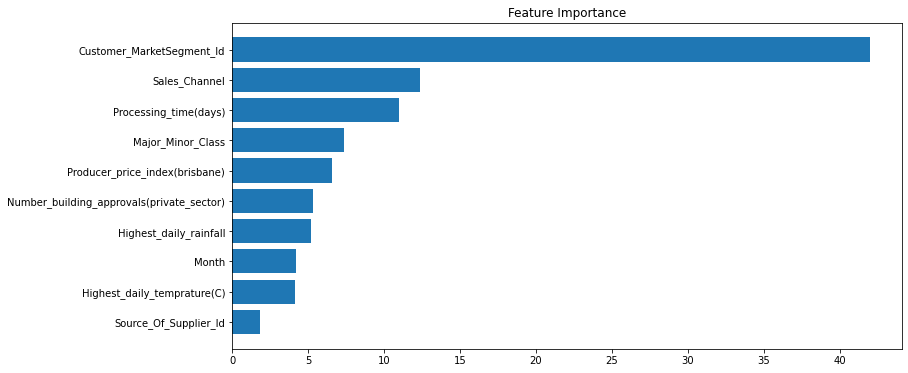

In [15]:
feature_importance = model.get_feature_importance(type= "FeatureImportance")
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

<AxesSubplot:>

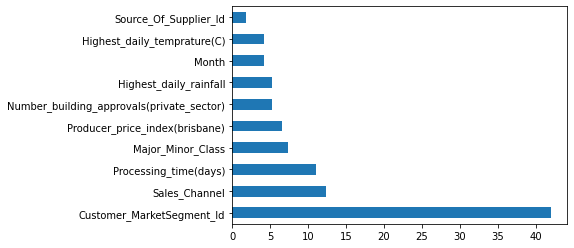

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

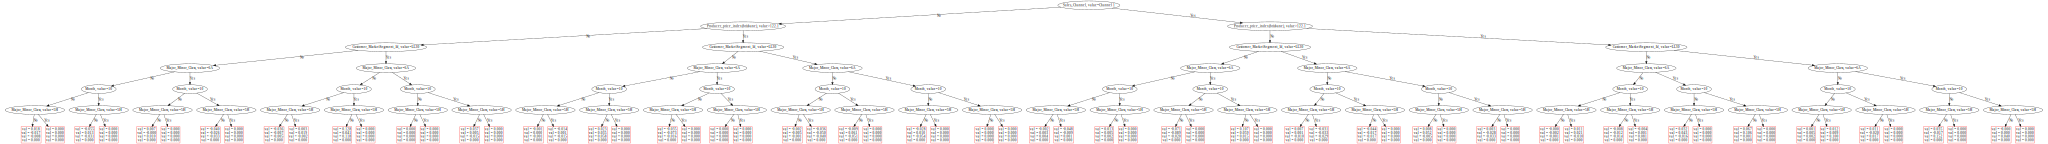

In [17]:
tree_plot = model.plot_tree(497, pool=train_data)
tree_plot.format = "png"
tree_plot.render("tree_plot")
tree_plot

In [18]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
# visualize the first prediction's explanation
#shap.force_plot(shap_values[0,:], X.iloc[0,:])

In [74]:
shap.force_plot(explainer.expected_value, shap_values[100,:], X_train.iloc[100,:])

TypeError: list indices must be integers or slices, not tuple

In [26]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[:], X_train[:])

AssertionError: The shap_values arg looks looks multi output, try shap_values[i].

In [22]:
#from sklearn.preprocessing import OrdinalEncoder
#enc = OrdinalEncoder()
#X_train_code = X_train
#X_train_code[cat_features] = enc.fit_transform(X_train[cat_features])

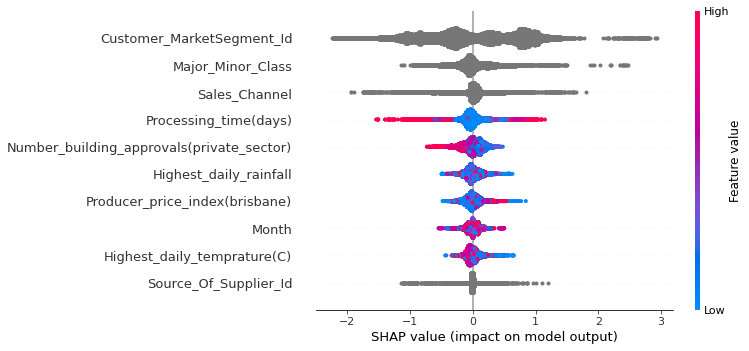

In [19]:
shap.summary_plot(shap_values[0], X.values, feature_names = X.columns)

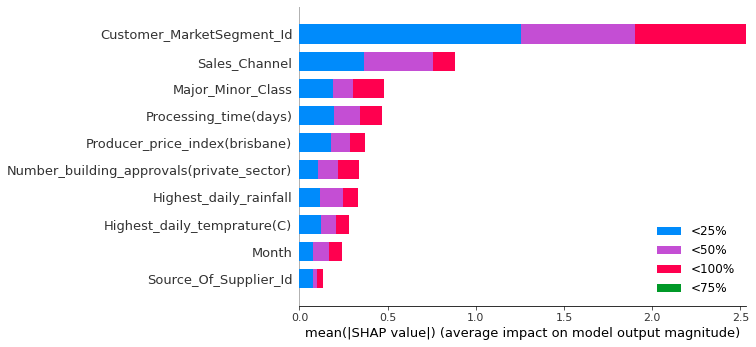

In [20]:
class_names = ['<100%', '<25%', '<50%', '<75%']
shap.summary_plot(shap_values, X, class_names= class_names)

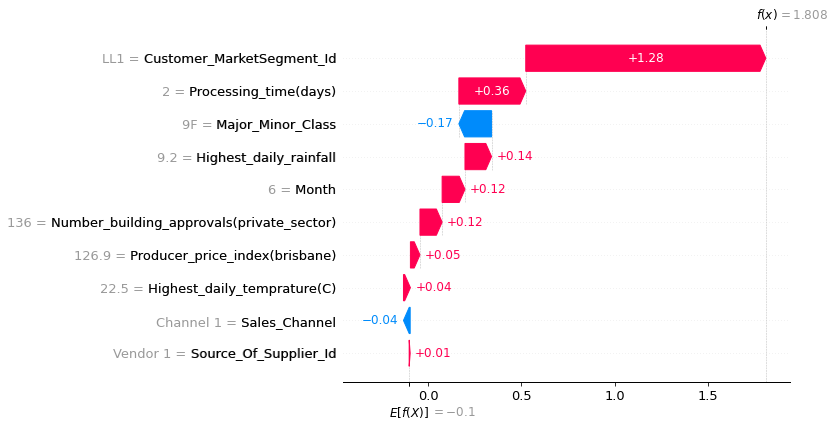

In [21]:
row = 9
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                    base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                    feature_names=X_test.columns.tolist()))

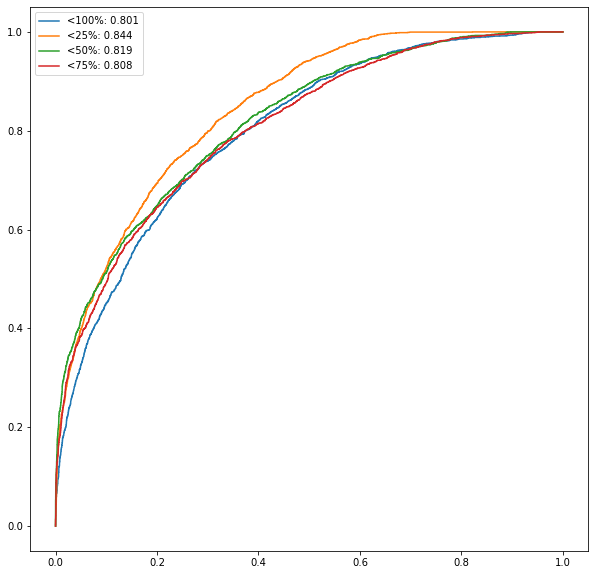

In [22]:
from sklearn.metrics import roc_curve, det_curve, roc_auc_score, auc

scores = model.predict_proba(X_test)
classes = np.unique(Y_train)

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
for i in range(4):
    fpr, tpr, _ = roc_curve(Y_test, scores[:,i], pos_label=classes[i])
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, label='%s: %0.3f' % (classes[i], auc_score))
ax.legend()

In [ ]:
#patterns of transactions(consistent or big transactions in a year)
#create a column to find out the distance to Toowoomba in related to postcode
#are small customers more affected by Covid than big customers
#we can also do a clustering
#the relationship between cat and product(clustring heatmap)
#note that covid starts in May 2020 in Australia, so we can try to find evidence of it
#consider regional weather data like thunderstorm or hailing
#distributions of transactions in related to cutomer_merket_segment
#vendor 1 or not  
#(TPR + FPR) - 1 = balanced Accuracy
#plot a TPR and FPR with ROC curve
#20% revenue is related to building construction
#volume is important, they care about volumes
#construction buisness is retail business
#created date is order date
#invoice date is giving date
#processing time should be related to pendemic, e.g.supply chain issue, unemployment rate, restrictions
#so the most important is the relation with pendemic, number of covid cases?
#stimulus packages?
#anything related to loans?
#would they save money from maintenace just because want to save money 
#the samples are mostly small contractors not big company
#add date into the analysis to see the frequency
#posson regression, make a regression model
#distance is highly correlated to our label(do a correlation matrix)
#remember why you connect these features, how do you tell the story
#channel 1 is over the counter
#add year into the data
#justification for the model, why this algorithm?
#compare several year's of weather data, see 2020/2021 is differ to 2019/2018 or not, same logic to other external data

In [ ]:
#As far as I know
#distance is highly correlated to our label
#after high level feature investigation, look into the details of important features, such as market segments VS. volume in each month
#make some assumptions and justify it(e.g. is rainfall/temparature related to number of transactions?)
#discribe the data from what trend we can see from raw data, e.g. we see these trends in raw data, can we reflect it in the model?
#use filter method to filter out small transactions, then see what big customers do!
#these are small business transactions, so the volume is important